# Regression
Regression is a type of supervised machine learning algorithm used to predict a continuous target variable. The target variable is continuous and has a range of values. It tries to find the best interpolation (fitting the curve) given an initial matrix of points and the known points of the target function. The algorithm relies on the concept of `gradient` of a function, as explained in the following sections.



## Theoratical Aspects

Starting from a dataset $X$, a label vector $y$ and a weight vector $w$, the algorithm tries to fit the data a way that minizes the in-sample error of the hypothesis $h$. 
The in-sample error is defined as the sum of the squared differences between the predicted values and the actual values. The algorithm tries to find the best weight vector $w$ that minimizes the in-sample error. The in-sample error is defined as:

$$E_{in}(w) = \frac{1}{N} \sum_{i=1}^{N} (h(x_i) - y_i)^2$$

where $N$ is the number of samples in the dataset, $y_i$ is the actual value of the target variable, $h(x_i)$ is the predicted value of the target variable and $w$ is the weight vector.

Exploiting the definition of the hypothesis $h(x)$, we can rewrite the in-sample error as:
$$
E_{in} = \frac{1}{N} \sum_{i=1}^{N} (w^T x_i - y_i)^2
$$
Also note that:
$$
\begin{aligned}
\sum_{i=1}^{N} (w^T x_i - y_i)^2 &= e_1 + e_2 + \cdots + e_N \\&= [\sqrt(e_1 + e_2 + \cdots + e_N)]^2 = ||e||^2
\end{aligned}
$$
where $e_i = w^T X_i - y_i$ :
$$
E_{in} = \frac{1}{N} ||w^T X_i - y_i||^2 = \frac{1}{N} ||X_i w - y_i||^2
$$

## Closed form solution

Using the same procedure as in the gradient descent algorithm, we can find the closed form solution for the weight vector $w$ that minimizes the in-sample error. The closed form solution is given by:

$$

\nabla E_{\text{in}} (w) = {2 \over N} [X^T (Xw - y)] = 0\\

\implies w = (X^T X)^{-1} X^T y
$$

### Implementaiton

Before the training, we need to define:
- Number of samples: $N$
- Spreading coefficient: `coeff` defines the range of the random values of the dataset

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314)

N = 250
coeff = 2

x = coeff * np.random.normal(size=N)

print(x.shape)

(250,)


After generating the input samples, we need to randomly generate the oracle function $y$. We want to insert a noise in the target to make it more realisitc, the noise is defined as a Gaussian function enhanced by the `power` coefficient.

We need also to define the steepness `m` of the line, and its intercept `q`. The line is defined as $y = m \cdot x + q$.

Target function is y = 2x + 3


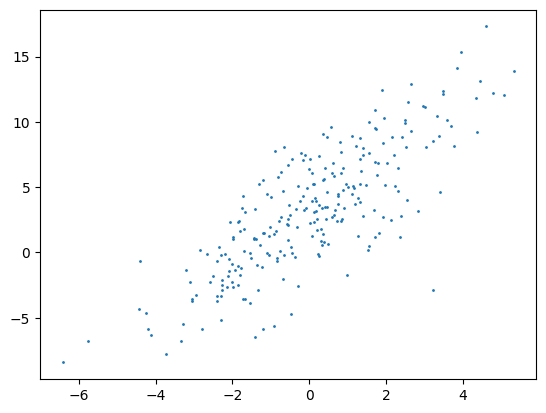

In [5]:
power = 3
noise = power * np.random.normal(size=N)

m = 2
q = 3

y = m * x + q + noise
print(f"Target function is y = {m}x + {q}")
plt.scatter(x, y, s = 1)

We also need to add the `bias` vector inside the matrix, in this case we are adding a column of ones to the matrix $X$.

Finally, we can calculate the weight vector $w$ using the closed form solution.

In [6]:
x0 = np.ones(N)
x_ = np.vstack((x0, x)).T
print(f"x_ size: {x_.shape}")

x_ size: (250, 2)


#### Interpolation
The fitting process is summarized in the following matrix multiplication:
$$
w = (X^T X)^{-1} X^T y
$$

Which is essentially called *pseud-inverse* of $X$. Note that the matrix multiplication is computationally comples to calculate: the average time complexity is $O(n^3)$, where $n$ is the number of features in the dataset.

In [10]:
w = np.dot (
  np.linalg.inv(
    np.dot(x_.T, x_)
  ),
  np.dot(x_.T, y)
)

Weights: [3.1114589  1.90134011]


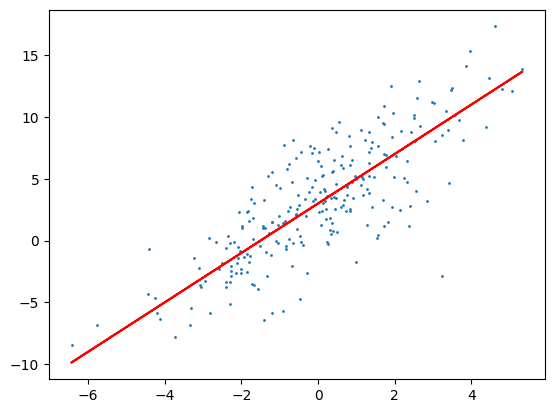

In [17]:
plt.scatter(x, y, s = 1)

plt.plot(x, m*x + q, color='red')
print(f"Weights: {w}")
